# Análise do consumo de cerveja de universitários

In [1]:
#Importando a biblioteca 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

## Processamento 

In [2]:
#Vendo os dados 
df = pd.read_csv("Data/Consumo_cerveja.csv")

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
#Verificando o tipo de dados 
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [4]:
#Mudando a coluna de data para datetime 
df['Data'] = pd.to_datetime(df['Data'])

#Vendo novamento o tipo de dados 
df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                  object
Temperatura Minima (C)                 object
Temperatura Maxima (C)                 object
Precipitacao (mm)                      object
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [5]:
#Mudando os dados de temperatura para números floats 
#Primeiro susbtituindo as vírgulas por ponto 
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(",",".")
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(",",".")
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(",",".")
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(",",".")

#Mudando o tipo 
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype("float64")
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype("float64")
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype("float64")
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype("float64")             


In [6]:
#Mudando o nome
df = df.rename(index=str, columns={"Temperatura Media (C)":"Temp_media","Temperatura Minima (C)":"Temp_min",
                                "Temperatura Maxima (C)":"Temp_max","Precipitacao (mm)":"Prep_mm"}) 

In [7]:
#Vendo os tipo de dados 
df.dtypes

Data                           datetime64[ns]
Temp_media                            float64
Temp_min                              float64
Temp_max                              float64
Prep_mm                               float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [8]:
#Vendo o shape dos dados 
print("Linhas: {}\nColunas: {}".format(df.shape[0], df.shape[1]))

Linhas: 941
Colunas: 7


In [9]:
#Verificando se há valores missing 
df.isnull().sum()

Data                           576
Temp_media                     576
Temp_min                       576
Temp_max                       576
Prep_mm                        576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [10]:
#Vendo os dados missing 
df[df.isnull()]

,Data,Temp_media,Temp_min,Temp_max,Prep_mm,Final de Semana,Consumo de cerveja (litros)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaT,NaN,NaN,NaN,NaN,NaN,NaN
937,NaT,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,NaN,NaN,NaN,NaN,NaN,NaN
939,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Deletando os dados missing já que as linhas inteiras estão missing
#Esse comportamento se deu por conta na hora do usuário fazer o upload dentro da plataforma Kaggle onde as últimas linhas foram dadas como NaN
df = df.dropna()

#E mudando o formato da coluna de final de semana que não podia ser alterada com NaN values 
df['Final de Semana'] = df['Final de Semana'].astype("int") 

In [12]:
#Vendo novamento o número de dados missing 
df.isnull().sum()

Data                           0
Temp_media                     0
Temp_min                       0
Temp_max                       0
Prep_mm                        0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

## EDA

In [13]:
df.head()

,Data,Temp_media,Temp_min,Temp_max,Prep_mm,Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [14]:
#Vendo a distribuição dos dados 

#Vendo coluna data 
print("Data mais antiga:{}\nData mais recente:{}".format(df['Data'].max(), df['Data'].min()))

Data mais antiga:2015-12-31 00:00:00
Data mais recente:2015-01-01 00:00:00


In [15]:
#Criando a função para fazer o boxplot para ver distribuição 
def boxplot(data,value,titulo):
    #Colocando as variáveis estatísticas
    min_value = data[value].min()
    max_value = data[value].max()
    mean_value = data[value].mean()
    median_value = data[value].median()

    #Pritando as respostas 
    print("Valor mínimo:{}\nValor Máximo:{}\nMédia:{}\nMediana:{}".format(min_value,max_value,mean_value,median_value)) 

    #Plotando o boxplot
    plt.figure(figsize=(16,5))
    plt.boxplot(data[value], vert=False)
    plt.title(titulo, loc='left', fontsize=20)
    plt.show()

Valor mínimo:12.9
Valor Máximo:28.86
Média:21.226356164383564
Mediana:21.38


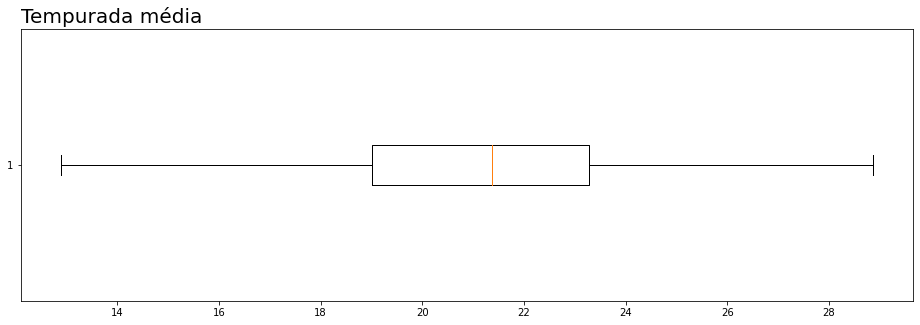

In [16]:
#Usando a função com a Temperatura Média
boxplot(df,"Temp_media","Tempurada média")

Valor mínimo:10.6
Valor Máximo:24.5
Média:17.461369863013697
Mediana:17.9


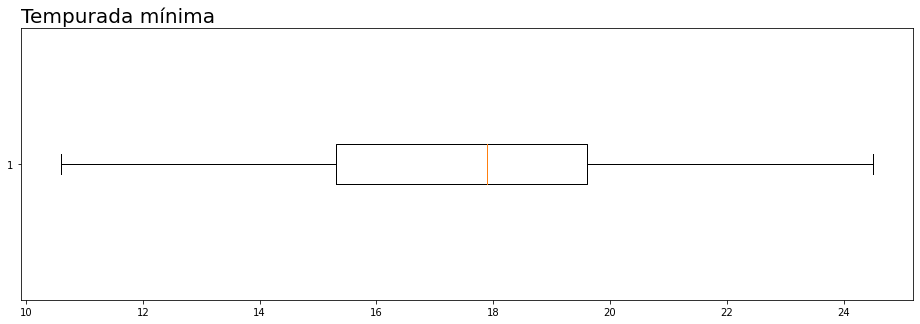

In [17]:
#Usando a função com a Temperatura Mínima
boxplot(df,"Temp_min","Tempurada mínima")

Valor mínimo:14.5
Valor Máximo:36.5
Média:26.61150684931507
Mediana:26.9


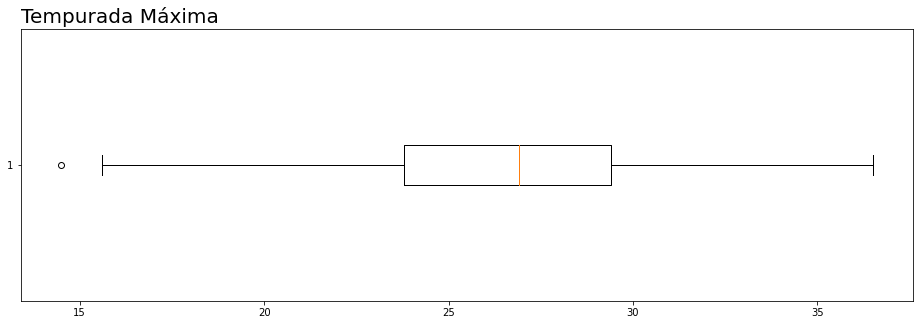

In [18]:
#Usando a função com a Temperatura Máxima
boxplot(df,"Temp_max","Tempurada Máxima")

Valor mínimo:14.343
Valor Máximo:37.937
Média:25.40136712328767
Mediana:24.867


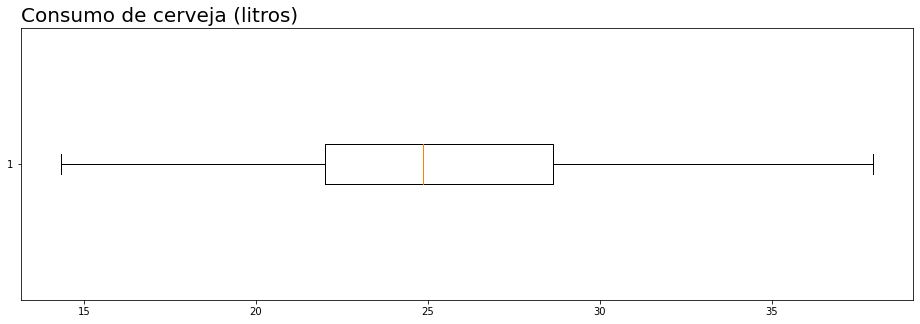

In [19]:
#Usando a função com o próprio Consumo de Cerveja
boxplot(df,"Consumo de cerveja (litros)","Consumo de cerveja (litros)")

In [20]:
#Conclusão boxplot 
# Conseguimos identificar que os dados estão praticamente com uma distribuição normal, o qu
# facilita muito nossas próximas análises

#Também podemos ver com clareza a variância que São Paulo tem em sua temperatura,
#Porém conseguimos ver que a média da maioria do ano é entre 19 e 23 graus. 

In [21]:
#Criando função para criar o gráfico de linha com a data 
def plotar_lineplot(data,x,y,titulo):
    fig = sns.lineplot(data=data,x=x,y=y)
    fig.figure.set_size_inches(12,6)
    fig.set_title(titulo, loc='left',fontsize=20)

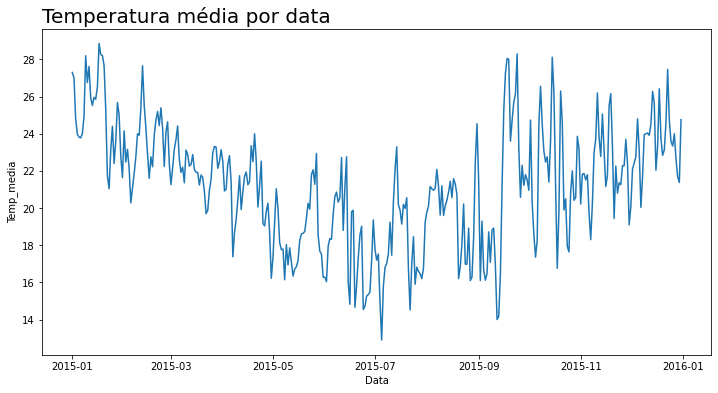

In [22]:
#Usando a função com a temperatura média 
plotar_lineplot(df,'Data','Temp_media','Temperatura média por data')

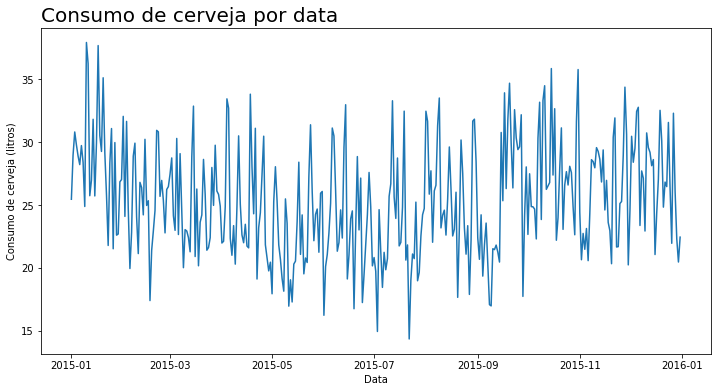

In [23]:
#Usando a função junto com a quantidade de consumo de cerveja 
plotar_lineplot(df,'Data','Consumo de cerveja (litros)','Consumo de cerveja por data')

In [24]:
#Vamos fazer um groupby ppor mês utilizando a média de consumo e de temperaduras 
# Para conseguir visualizar esses dados de maneira mais limpa 

#Criando uma coluna de mês
df['Mes'] = df['Data'].dt.month

#Vendo os dados 
df.head()


,Data,Temp_media,Temp_min,Temp_max,Prep_mm,Final de Semana,Consumo de cerveja (litros),Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1


In [57]:
#Vamos fazer o groupby com 
#A média do mês de temperatura média 
#A média do consumode cerveja por litros 

#Fazendo o groupby
mes_agrupado = df.groupby('Mes')[['Temp_media','Prep_mm','Consumo de cerveja (litros)']].mean().reset_index()

#Vendo os dados 
mes_agrupado

,Mes,Temp_media,Prep_mm,Consumo de cerveja (litros)
0,1,25.218065,5.038710,28.677645
1,2,23.555000,9.750000,25.673143
2,3,22.167097,10.732258,25.036387
3,4,20.837333,3.603333,24.624100
4,5,18.596774,1.635484,22.798387
5,6,18.070000,0.676667,23.627067
6,7,17.887097,2.100000,22.572871
7,8,19.900000,1.019355,25.908968
8,9,21.000667,6.723333,25.198133
9,10,21.905806,2.970968,27.653194


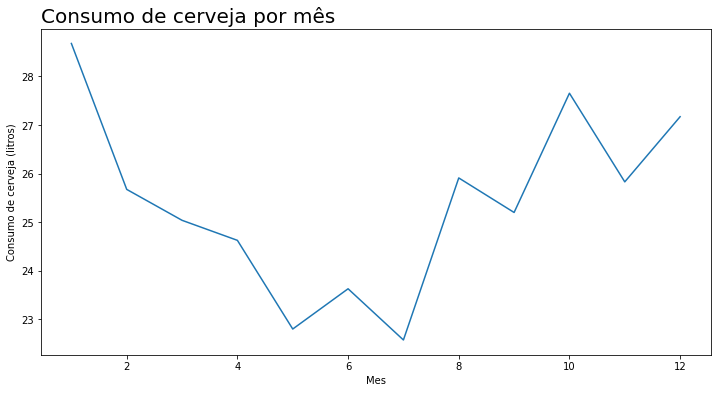

In [26]:
#Utilizando a função de plotar com os dados agrupados 
plotar_lineplot(mes_agrupado,'Mes','Consumo de cerveja (litros)','Consumo de cerveja por mês')

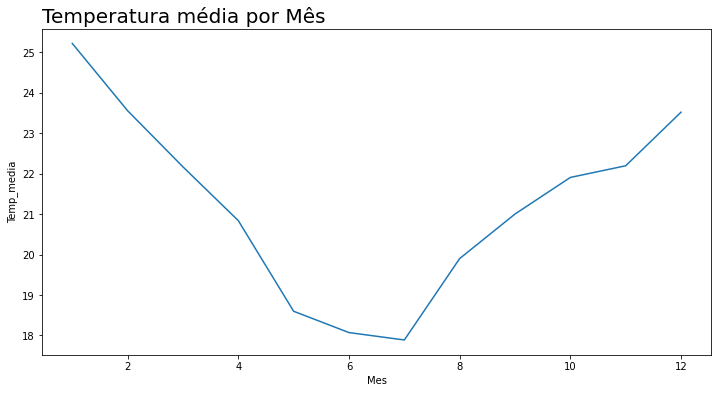

In [27]:
#Utilizando a função com a temperatura média 
plotar_lineplot(mes_agrupado,'Mes','Temp_media','Temperatura média por Mês')

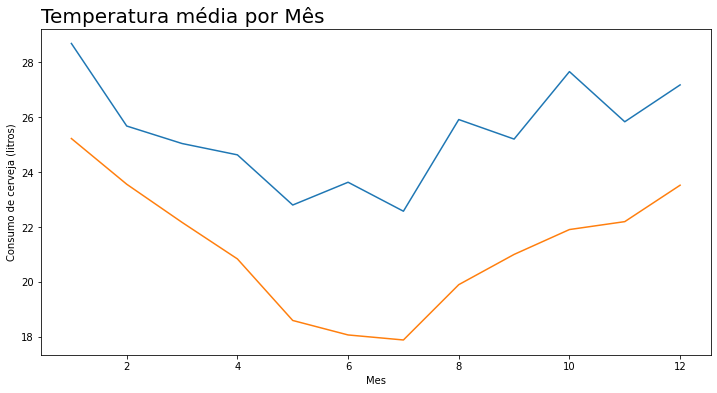

In [28]:
#Juntando os dois gráficos 
plotar_lineplot(mes_agrupado,'Mes','Consumo de cerveja (litros)','Consumo de cerveja por mês')
plotar_lineplot(mes_agrupado,'Mes','Temp_media','Temperatura média por Mês')

In [29]:
#Com esse gráfico podemos visualizar que o consumo de cerveja decai bastante entre os meses 
#de inverno no Brasil, mesmo que seja um mÊs de férias o consumo de cerveja decai por conta da baixa temperatura
#Após o início da Primavera o consumo de cerveja sobe novamente seguindo seu ápice durante o verão entre os meses 10,11,12 e 1

In [30]:
#Fazendo a análise pelos meses do ano 
#Usando já o df de mÊs agrupados iremos pegar as estações para ver alguns dados 

mes_agrupado['estacao'] = mes_agrupado['Mes']

#Vendo os dados 
mes_agrupado.head()

,Mes,Temp_media,Consumo de cerveja (litros),estacao
0,1,25.218065,28.677645,1
1,2,23.555000,25.673143,2
2,3,22.167097,25.036387,3
3,4,20.837333,24.624100,4
4,5,18.596774,22.798387,5


In [31]:
#Substituindo os meses pelas suas respepctivas estações 
#Vendo o tipo dos dados 
mes_agrupado.dtypes

Mes                              int64
Temp_media                     float64
Consumo de cerveja (litros)    float64
estacao                          int64
dtype: object

In [32]:
#Mudando as estacao para str 
mes_agrupado['estacao'] = mes_agrupado['estacao'].astype('str')

In [33]:
#Vendo os dados
mes_agrupado.dtypes

Mes                              int64
Temp_media                     float64
Consumo de cerveja (litros)    float64
estacao                         object
dtype: object

In [34]:
#Mudando as estacoes 
mes_agrupado['estacao'] = mes_agrupado['estacao'].replace({"1":"Verão","2":"Verão",
                                                           "3":"Verão","4":"Outono",
                                                           "5":"Outono","6":"Outono",
                                                           "7":"Inverno","8":"Inverno",
                                                           "9":"Inverno","10":"Primavera",
                                                           "11":"Primavera","12":"Primavera"})

In [35]:
#Vendo os dados 
mes_agrupado.head()

,Mes,Temp_media,Consumo de cerveja (litros),estacao
0,1,25.218065,28.677645,Verão
1,2,23.555000,25.673143,Verão
2,3,22.167097,25.036387,Verão
3,4,20.837333,24.624100,Outono
4,5,18.596774,22.798387,Outono


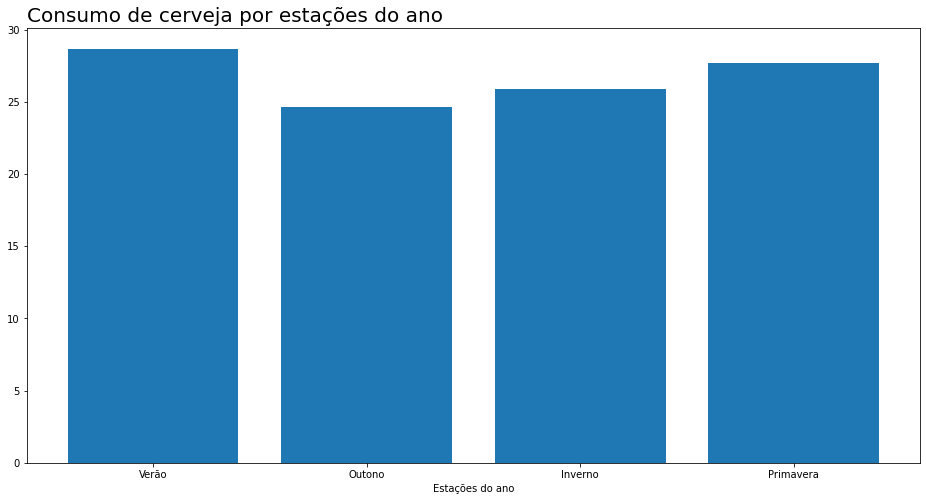

In [36]:
#Vendo o consumo pela estacao 
plt.figure(figsize=(16,8))
plt.bar(mes_agrupado['estacao'],height=mes_agrupado['Consumo de cerveja (litros)'])
plt.title("Consumo de cerveja por estações do ano", loc='left', fontsize=20)
plt.xlabel("Estações do ano")
plt.show()

In [37]:
#Seguindo a hipotése do gráfico anterior, o consumo de cerveja chega ao seu ápice 
# Nos messes quentes de São Paulo 
#Porém conseguimos ver que ainda sim a média de consumo de cerveja de universitários 
#É alta durante os 375 dias do ano 

In [38]:
df.head()

,Data,Temp_media,Temp_min,Temp_max,Prep_mm,Final de Semana,Consumo de cerveja (litros),Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1


In [39]:
#Fazendo uma análise com os finais de semana

#Fazendo um groupby dos finais de semana apenas para criar o gráfico 
final_semana = df.groupby("Final de Semana")["Consumo de cerveja (litros)"].mean().reset_index()

In [40]:
#Vendo os dados 
final_semana

,Final de Semana,Consumo de cerveja (litros)
0,0,23.998222
1,1,28.922721


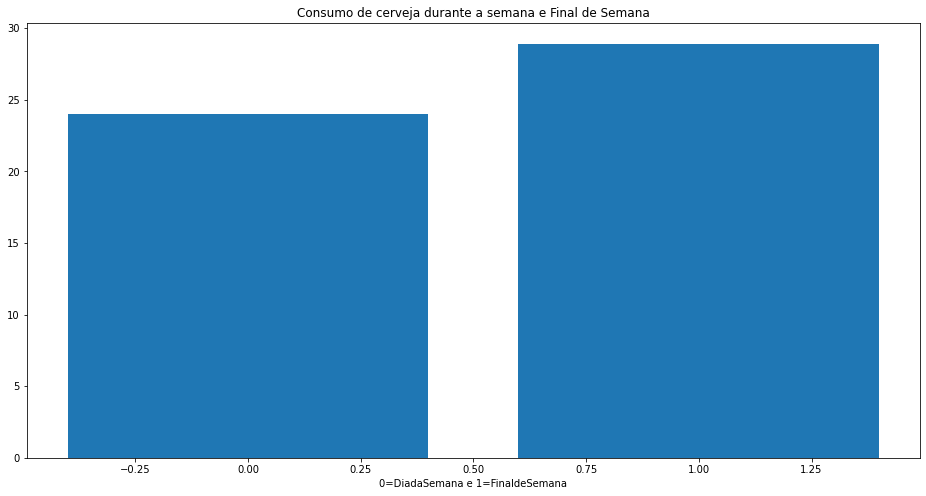

In [41]:
#Criando o gráfico para facilitar a visualização 
plt.figure(figsize=(16,8))
plt.bar(final_semana['Final de Semana'], height=final_semana['Consumo de cerveja (litros)'])
plt.title("Consumo de cerveja durante a semana e Final de Semana")
plt.xlabel("0=DiadaSemana e 1=FinaldeSemana")
plt.show()

In [42]:
#Como podemos o consumo durante o final de semana é maior do que nos dias da semana

#Com base na análise nós conseguimos visualizar que 
#Em meses de verão ou dias com alta temperaturas o consumo de cerveja é maior 
#No início e final do ano o consumo de cerveja é maior 
#O consumo de cerveja é maior duranteo o final de semana do que nos dias da semana

## Criando uma algoritmo de Machine Learning para fazer a predição de quantos litros de consumo de cerveja serão feitos em uma dia específico 

In [43]:
#Importando as bibliotecas necessárias para o algoritmo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve

In [53]:
#Primeiro vamos separar os features com nossa coluna de target 
features = ['Temp_media','Temp_min','Temp_max','Prep_mm','Final de Semana']
target = ['Consumo de cerveja (litros)']

#Seprando em variáveis 
X, y = df[features], df[target]

In [54]:
#Separando entre os dados de treino e os dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [55]:
#Pegando o algoritmo 
model = LogisticRegression()

In [56]:
#Treinando o modelo com os dados de teste 
model.fit(X_train, y_train)

C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'

In [46]:
df.head()

,Data,Temp_media,Temp_min,Temp_max,Prep_mm,Final de Semana,Consumo de cerveja (litros),Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1
